<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-входных-данных" data-toc-modified-id="Изучение-входных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение входных данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Общая-информация-о-датафрейме-и-предобработка-данных" data-toc-modified-id="Общая-информация-о-датафрейме-и-предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация о датафрейме и предобработка данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Алгоритм выполнения работы**

1. Загрузка и анализ имеющихся данных
2. Необходимо ответить на вопрос и обосновать решение. 
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать почему качество линейной регрессии не поменяется:
- разделить выборку на признаки + целевой признак
- создать обратимую матрицу размером 4х4, проверить, что она обратима
- признаки умножить на обратимую матрицу
- посчитать метрику R2 до и после шифрования данных пользователей (умножением на обратимую матрицу)
4. Проверить работу этого алгоритма, применив матричные операции:
- вернуть в исходное состояние зашифрованную матрицу умножив ее на обратную
- сравнить данные матриц до и после шифрования

## Изучение входных данных

### Загрузка данных

In [1]:
# для анализа и работы с данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# алгоритмы машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# метрики для алгоритмов ML
from sklearn.metrics import r2_score

In [2]:
# загрузка датафрейма (try - локально, except - по ссылке)
try:
    df = pd.read_csv('D:\jupyter notebook EDU\data\insurance.csv')
   
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

### Общая информация о датафрейме и предобработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Колонках "Возраст" и "Зарплата" в датафрейме имеет тип данных **float64**, но при этом десятичных значений нет. Преобразуем ее в тип **integer**

In [5]:
# преобразуем колонкм "Возраст" и "Зарплата" датафрейма df из типа float в тип integer
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)

Посмотрим на количество пропусков и дубликатов:

In [6]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
df.duplicated().sum()

153


    
**ВАЖНОЕ ЗАМЕЧАНИЕ**
    
Удалим дублирующиеся строки. Однако, нужно помнить о том, что дубликаты в данных могут быть из-за особенностей клиентской базы (например, сотрудники госучреждений), где разные люди могут иметь дублирующиеся данные, такие как одинаковый оклад, одинаковый возраст, состав семьи и т.д. В таких случаях без иникального идентификатора клиента отличить разных людей будет невозможно

In [8]:
# удаляем
df.drop_duplicates(inplace=True)

# проверяем
df.duplicated().sum()

0

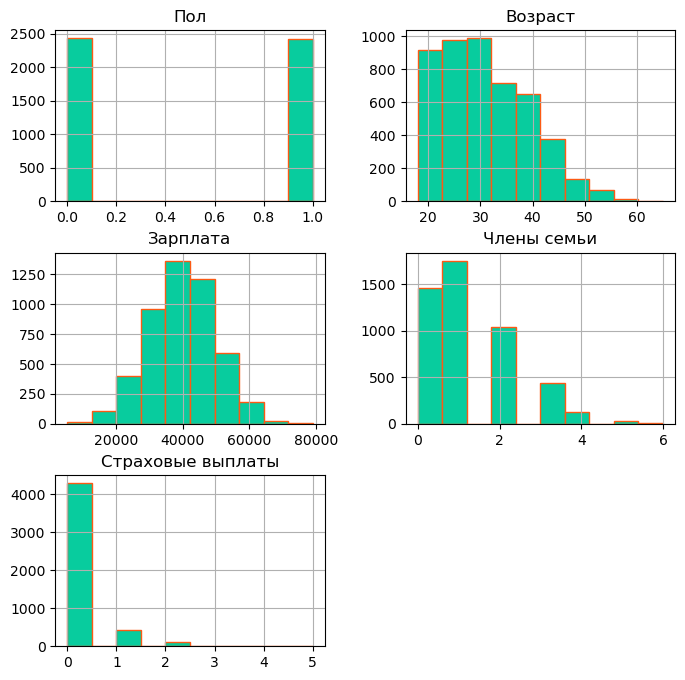

In [9]:
# откроем датафрейм, посмотрим на содержимое
df.hist(figsize=(8, 8), color='#08cc9e', ec='#fc5a14')
plt.show()

Статистические данные датафрейма

In [10]:
display(np.round(df.describe(), 2).T)

,count,mean,std,min,25%,50%,75%,max
Пол,4847.0,0.50,0.50,0.0,0.0,0.0,1.0,1.0
Возраст,4847.0,31.02,8.49,18.0,24.0,30.0,37.0,65.0
Зарплата,4847.0,39895.81,9972.95,5300.0,33200.0,40200.0,46600.0,79000.0
Члены семьи,4847.0,1.20,1.10,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,4847.0,0.15,0.47,0.0,0.0,0.0,0.0,5.0


Посмотрим на матрицу корреляции признаков

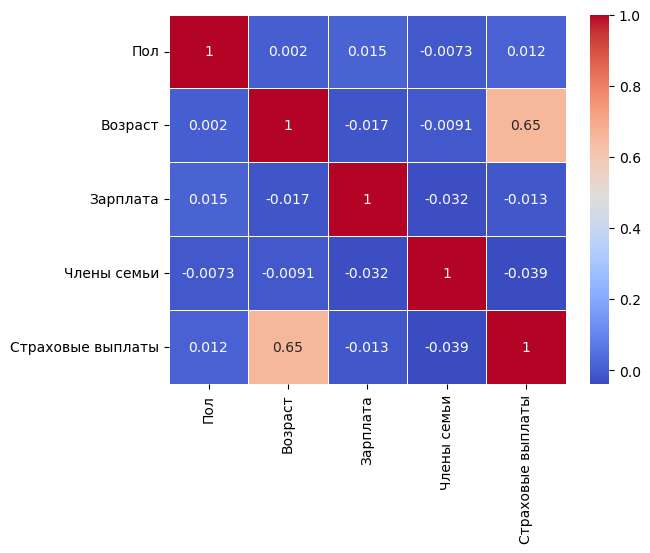

In [11]:
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap='coolwarm')
plt.show()

### Описание данных

In [12]:
df.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет (колонка 'Страховые выплаты')


    
**Выводы п.2:**
- В колонке с Заработной платой есть мимимальное значение в равзмере 5300 рублей, что конечно сильно выделяется, но эти строки оставим для обучения модели, эти данные важны. По остальным колонкам выбросов нет
- Заметно выделяется количество мужчин и женщим - их поровну
- Пропусков в датафрейме нет
- Строковых значений в датафрейме нет, только числовые
- Явные дубликаты были удалены
- С целевым признаком - Страховыми выплатами больше всего коррелирует возраст клиентов

## Умножение матриц

**ЗАДАЧА:**

Необходимо ответить на вопрос и обосновать решение. 
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- a. Изменится. Приведите примеры матриц.
- b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**УСЛОВИЕ И ИСХОДНЫЕ ДАННЫЕ:**


Предсказания:

$
a = Xw
$

Задача обучения:

$
w = \arg\min_w MSE(Xw, y)
$

Формула обучения:

$
w = (X^T X)^{-1} X^T y
$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**ДОКАЗАТЕЛЬСТВО:**

$
a = X\cdot w
$ 

Шифрование обычной матрицы обратимой матрицей P: 

$
a' = X\cdot P\cdot w'
$ 
 
    
Формула обучения w' для новой матрицы:
    
$
w' = ((X\cdot P)^T \cdot (X\cdot P))^{-1}\cdot (X\cdot P)^T\cdot Y 
$

У нас матрица **P** обратимая, квадратная матрица, размер которой равен ширине **Х**:

Теперь:
$
X' = X\cdot P
$

$
w' = argminMSE(X\cdot P\cdot w, y)
$


В формулу $w$ (вектор весов линейной регрессии) вставим $X$ и получим :

$
w' = ((X\cdot P)^T X\cdot P)^{-1} (X\cdot P)^T y
$

Используя свойства обратных матриц, раскроем скобки:

$
w' = P^{-1}((X\cdot P)^T X)^{-1}(X\cdot P)^T y
$

Транспонируем матрицу, раскроем скобки:

$
w' = P^{-1}(P^T\cdot X^T\cdot X)^{-1} P^T\cdot X^T\cdot y
$


Вынесем за скобки $(P^T..)^{-1}$:

$
w' = P^{-1}(X^T\cdot X)^{-1}(P^T)^{-1} P^T\cdot X^T\cdot y
$

Сократим выражение $(P^{T})^{-1} P^T$:

$
w' = P^{-1}(X^T\cdot X)^{-1} X^T\cdot y
$

Заметим, что эта часть $ (X^T\cdot X)^{-1} X^T\cdot y $ равняется описанному выше $w$:

$
w' = P^{-1}\cdot w
$

Подставим это в формулу $w$ для нахождения $a' = X'\cdot w'$ и получим:

$
a' = X'\cdot P^{-1}\cdot w
$

Также подставим из и получим:
$
a' = X\cdot P\cdot P^{-1}\cdot w
$

$P\cdot P^{-1} $ сокращается

В итоге получаем:
$
a' = X\cdot w
$

А значит:
$
a' = a
$

**ВЫВОД:**
при умножении матрицы **X** на обратимую,квадратную матрицу **P** качество линейной регрессии не изменится


    
**Выводы п.3 + ОТВЕТ:**

Если признаки умножить на обратимую матрицу, то качество линейной регрессии *НЕ ИЗМЕНИТСЯ*

## Алгоритм преобразования

**ЗАДАЧА:**
В данном разделе необходимо предложить алгоритм преобразования данных для решения задачи. Обосновать почему качество линейной регрессии не поменяется.После чего запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

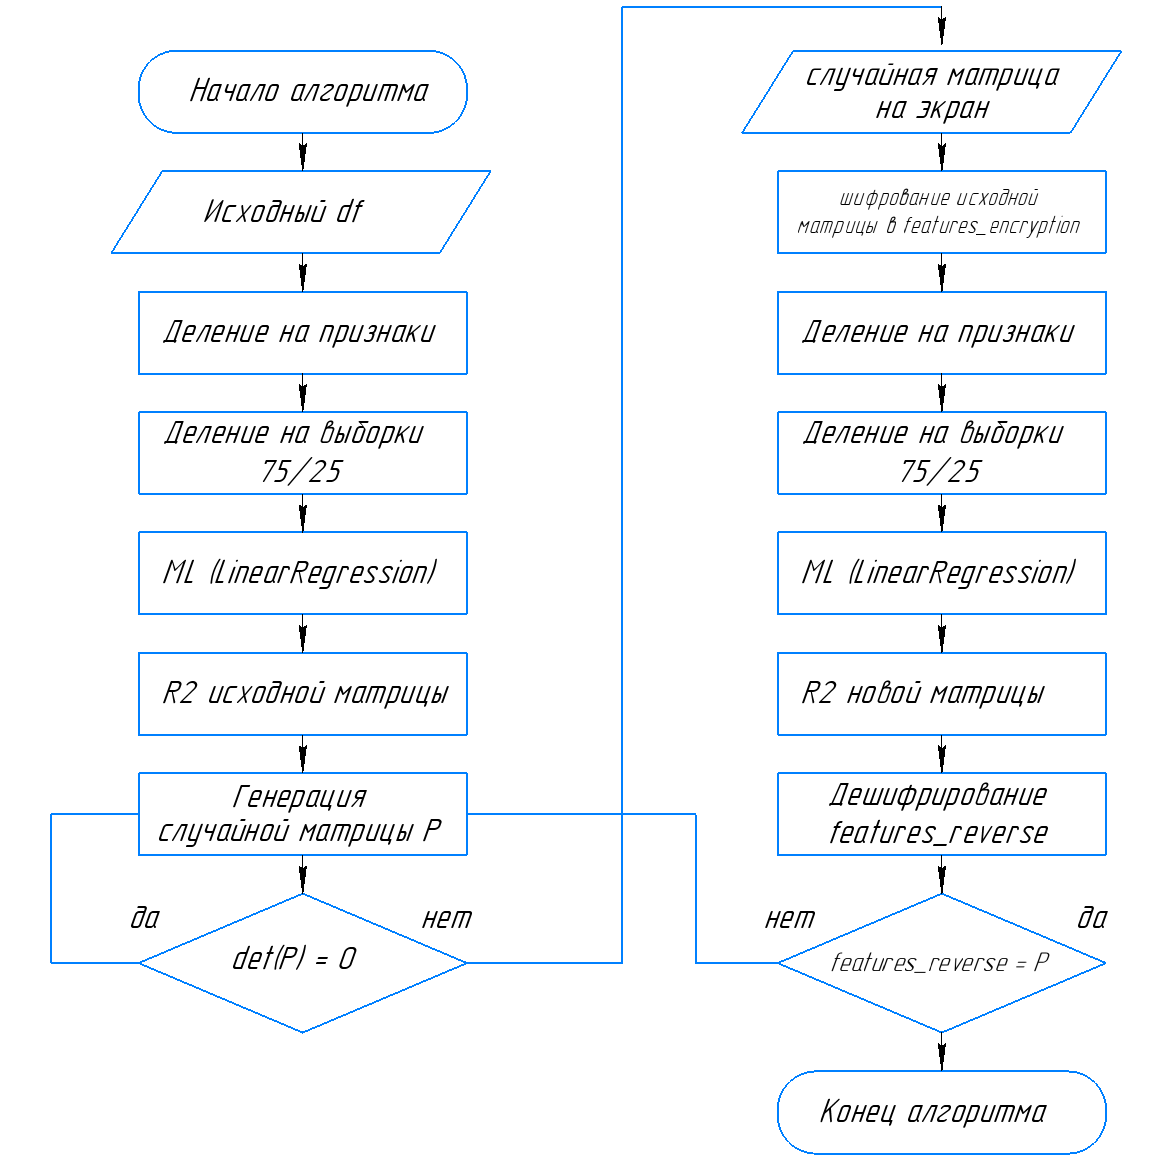

Обоснование

При умножениии матрицы признаков на обратимую матрицу, вектор весов линейной регрессии после преоброзования связан со старым:

$$
w`=P^{-1}w
$$
При этом чтобы получить исходные признаки, т.е. расшифровать их, необхоодимо домножить матрицу преобразованных признаков на матрицу обратную P



In [14]:
# разделение на выборки обуч. 75% и тестовую 25%
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=112)

model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(=features_test)

r2_source = r2_score(target_test, predictions)
print(f'Метрика R2 для исходной матрицы: {r2_source}')

Метрика R2 для исходной матрицы: 0.44973497713702293


Создадим рандомную матрицу, которую будем использовать для шифрования данных, проверим ее на обратимость через детерминант. Чтобы найти обратную матрицу, вызовим функцию numpy.linalg.inv() (от англ. linear algebra, «линейная алгебра»; invert, «обратить»). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка.

In [15]:
def get_rand_matrix(features):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
        features_encryption = features @ matrix
    return matrix, features_encryption

Зашифруем данные пользователей, умножив признаки на полученную обратимую матрицу, далее посчитаем метрику **R2** на шифрованных данных

In [16]:
matrix, features_encryption = get_rand_matrix(features)

In [17]:
# посмотрим на созданную случайную матрицу
print(matrix)

[[ 0.03785368 -0.19267632  0.87893267 -0.77123077]
 [ 0.73338115  0.32843766 -0.8295851   0.61344847]
 [-0.48754631 -0.09876289 -0.73921872  2.52530821]
 [ 0.20943844  1.17758936  0.61107523  0.3269743 ]]


Сделаем разбивку на выборки зашифрованные данные, обучим модель и посчитаем метруку **R2** на зашифрованных данных

In [18]:
# разделение на выборки обуч. 75% и тестовую 25% для зашифрованных данных
features_enc_train, features_enc_test, target_enc_train, target_enc_test = train_test_split(
    features_encryption, target, test_size=.25, random_state=112)

model_enc = LinearRegression()
model_enc.fit(features_enc_train, target_enc_train)
predictions_enc = model_enc.predict(features_enc_test)

r2_encrypted = r2_score(target_enc_test, predictions_enc)
print(f'Метрика R2 после шифрования: {r2_encrypted}')

Метрика R2 после шифрования: 0.4497349771372131


Вычислим разницу мертик **R2** до и после шифрования

In [19]:
R2_change = r2_source - r2_encrypted
R2_change

-1.9018120411828932e-13


    
**Выводы п.4:**
    
- описан алгоритм шифрования данных пользователей с помощью обратимой матрицы
- метрики **R2** до и после шифрования совпали до 11-го знака после запятой (можно считать, что полностью совпали, т.к. -12 степень появилась из-за особенностей расчетов в Питоне), это говорит о том, что качество модели не меняется в результате шифрования данных пользователей

## Проверка алгоритма

**ЗАДАЧА:** Проверить правильность работы алгоритма описанного выше

Приведем зашифрованную матрицу к исходной умножив ее на обратную матрицу, созданную ранее **matrix**. Сравним ее с исходной

In [20]:
features_reverse= features_encryption @ np.linalg.inv(matrix)
features_reverse.head(5)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,0.000000e+00,46.0,38000.0,1.000000e+00
2,-7.275958e-12,29.0,21000.0,-9.094947e-13
3,0.000000e+00,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-4.547474e-13


In [21]:
features.head(5)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Проверим равенство исходных данных и зашифрованных после преобразования обратно в исходные.


In [22]:
# Сверим расшифрованные данные с оригиналом
count = 0
for i in range(len(features_reverse)):
    if (np.round(features_reverse.values[i], 0) == np.round(features.values[i],0)).all() == True:
        pass
    else:
        count += 1
        break
if count > 0:
    print('Данные после расшифровки не совпали с исходными')
else:
    print('Данные после расшифровки совпали с исходными')

Данные после расшифровки совпали с исходными



    
**Выводы п.5:**
Матрицы равны. Данные после расшифровки совпали с оригиналом

**Общий вывод:**

В данной работе перед нами стояла задача создания такого алгоритма преобразования данных, который смог бы скрывать персональную информацию о клиентах страховой компании "Хоть потоп". Для достижения поставленных целей мы:

- выбрали метод матричных преобразований, который путём умножения матрицы с данными на обратимую матрицу позволяет скрыть персональную информацию клиентов компании

- проверили и убедились в том, что матрица для умножения на данные должна быть именно обратимой, так как при умножении признаков на необратимую матрицу возникает существенный риск безвозвратной потери информации. Обработали этот риск, в результате чего наш алгоритм всегда проверяет сформированную матрицу на её обратимость, предварительно вычисляя для неё детерминант

- проверили работу алгоритма, зашифровав данные и расшифровав их обратно

- на каждом этапе исследования формировали предсказания и с помощью коэффициента детерминации R2 замеряли, насколько хорошо модель соответствует данным. В результате проведённых замеров мы убедились в том, что значение R2 для зашифрованных и расшифрованных данных совпадают. Это означает то, что и качество алгоритма линейной регрессии от шифрования данных путём преобразования матриц не теряется, а значит и зависимости между признаками сохраняются.

В целом, данный алгоритм преобразования данных может быть полезен в сфере защиты конфиденциальной информации и обеспечения безопасности данных. Он позволяет скрыть персональную информацию клиентов страховой компании, сохраняя при этом зависимости между признаками и качество модели линейной регрессии. Однако, стоит отметить то, что разработанный нами алгоритм преобразования конфиденциальных данных клиентов с целью их защиты может не до конца отвечать современным требованиям безопасности, так как:

- он достаточно прост
- при больших данных он будет очень дорогим в потреблении ресурсов